In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns




# Data info

In [397]:
#uploading data
train_data = pd.read_csv('train.csv')
evaluate_data = pd.read_csv('evaluate.csv')

In [398]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
train_data["label"].unique() 

array([1, 0], dtype=int64)

Here we have classification problem with 2 possible labels

In [400]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


In [401]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2400.000000,2400.0,2400.0,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.000000,2400.000000,2400.0
mean,0.484167,0.0,0.0,0.0,0.002083,0.098333,0.302500,0.846250,2.256250,6.025000,...,65.379583,26.975417,9.651667,3.307500,1.249167,0.460417,0.11250,0.038750,0.010833,0.0
std,0.499853,0.0,0.0,0.0,0.067682,1.895871,5.014792,9.262155,15.491603,25.358871,...,66.874570,49.060424,30.540885,18.067668,11.443957,6.363199,2.82043,1.742655,0.530723,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
75%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.250000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
max,1.000000,0.0,0.0,0.0,3.000000,69.000000,188.000000,189.000000,219.000000,243.000000,...,248.000000,252.000000,246.000000,212.000000,179.000000,176.000000,88.00000,85.000000,26.000000,0.0


In [402]:
# Cheacking for missing values(there are none)
missing_values = train_data.isnull().sum()

In [403]:
missing_values[missing_values > 0]

Series([], dtype: int64)

# Data processsing

In [404]:
#splitting the data into attributes and target variable
X = train_data.drop('label', axis=1).values / 255 #normalizace 
y = train_data['label'].values

In [405]:
X = X.reshape(-1, 28, 28)

In [406]:
#splitting to train val test sets
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.2, random_state=42)


In [407]:
X_test, X_val, y_test, y_val = train_test_split(X_tes, y_tes, test_size=0.5, random_state=42)


In [408]:
print("train data:", X_train.shape)
print("val data:", X_val.shape)
print("test data:", X_test.shape)

train data: (1920, 28, 28)
val data: (240, 28, 28)
test data: (240, 28, 28)


#### Vizualization of images

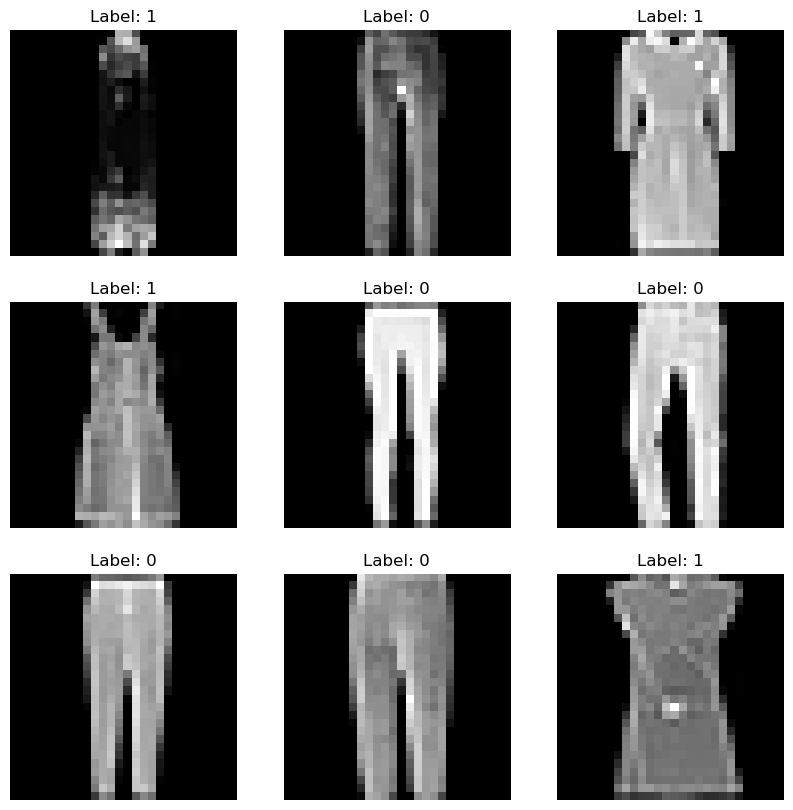

In [409]:
figure = plt.figure(figsize=(10, 10))  
cols, rows = 3, 3 

# first 9 img in dataset
for i in range(1, cols * rows + 1):
    img = X_train[i] 
    label = y_train[i]
    fig = figure.add_subplot(rows, cols, i)  
    fig.set_title(f'Label: {label}', color='black')  # label of img
    plt.axis('off')  
    plt.imshow(img, cmap='gray')  # in gray

plt.show()  


Data consists of images of dresses(1) and pants(0)

##### Function for evaluation:

In [410]:
def evaluate_model(model, X_val, y_val, model_name="Model"):

    # Prediction of values on the val set
    y_pred = model.predict(X_val)

    # accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, target_names=[str(i) for i in np.unique(y_val)]))

    # Confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred)

    #  DataFrame 
    conf_mat_df = pd.DataFrame(conf_mat)
    
    conf_mat_df.index = ['Positive', 'Negative']
    conf_mat_df.columns = ['Positive', 'Negative']
    
    print("\nConfusion Matrix:")
    print(conf_mat_df)

# SVM

**Linear kernel** usually works better for large datasets with many features, where classes are linearly separable.   
**RBF kernel** is more suitable for cases where the data is not linearly separable. It can identify complex patterns in the data but also it is easy to overfit model.

#### Linear kernel

In [411]:
#scaling and applying svm
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

In [412]:
#using grid search
param_grid_linear = {
    'svm__C': [0.1, 1, 10]
}

In [413]:
grid_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=3, scoring='accuracy')
grid_linear.fit(X_train.reshape(-1, 784), y_train)  # Переформатирование для использования в SVM

print("Best parametrs for linear kernel:", grid_linear.best_params_)
print("Best accuracy:", grid_linear.best_score_)

Best parametrs for linear kernel: {'svm__C': 0.1}
Best accuracy: 0.9656250000000001


In [414]:
evaluate_model(grid_linear.best_estimator_, X_val.reshape(-1, 784), y_val, model_name="Linear SVM")

Accuracy of Linear SVM: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.95      0.98      0.96       121

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         3       118


#### RBF kernel

In [415]:
pipeline_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

In [416]:
param_grid_rbf = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1]
}

In [417]:
grid_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=3, scoring='accuracy')
grid_rbf.fit(X_train.reshape(-1, 784), y_train)

print("Best parametrs for RBF kernel:", grid_rbf.best_params_)
print("Best accuracy:", grid_rbf.best_score_)

Best parametrs for RBF kernel: {'svm__C': 10, 'svm__gamma': 0.01}
Best accuracy: 0.9385416666666666


In [418]:
evaluate_model(grid_rbf.best_estimator_, X_val.reshape(-1, 784), y_val, model_name="RGB SVM")

Accuracy of RGB SVM: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       119
           1       0.90      1.00      0.95       121

    accuracy                           0.94       240
   macro avg       0.95      0.94      0.94       240
weighted avg       0.95      0.94      0.94       240


Confusion Matrix:
          Positive  Negative
Positive       105        14
Negative         0       121


For image classification the model with rbf kernel often works better because it detects complex patterns better, but in this case the model with linear kernel did a little better (96% vs. 93%).

# Naive Bayes Classifier

We use Gaussian NB, assuming that the data of each feature has a normal distribution. Usually this model does not require much hyperparameter tuning.

In [419]:
nb_model = GaussianNB()
nb_model.fit(X_train.reshape(-1, 784), y_train)  
y_pred_nb = nb_model.predict(X_val.reshape(-1, 784))

In [420]:
evaluate_model(nb_model, X_val.reshape(-1, 784), y_val, model_name="Naive Bayes")

Accuracy of Naive Bayes: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       119
           1       0.92      0.99      0.95       121

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240


Confusion Matrix:
          Positive  Negative
Positive       108        11
Negative         1       120


# LDA

LDA usuallly give good results if the classes are linearly separable. in our case score is 95% wich is good result

In [421]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train.reshape(-1, 784), y_train)
y_pred_lda = lda_model.predict(X_val.reshape(-1, 784))


In [422]:
evaluate_model(lda_model, X_val.reshape(-1, 784), y_val, model_name="LDA")

Accuracy of LDA: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       119
           1       0.94      0.96      0.95       121

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240


Confusion Matrix:
          Positive  Negative
Positive       112         7
Negative         5       116


# PCA and LLE

In [423]:
# data standartization
scaler = StandardScaler()

# changing the data shape before submitting it to StandardScaler
X_train_reshaped = X_train.reshape(-1, 784)  # from 28, 28 to 784
X_val_reshaped = X_val.reshape(-1, 784)
X_test_reshaped = X_test.reshape(-1, 784)

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [424]:
pca = PCA(n_components=0.95)  # preserving 95% of the variability
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [425]:
lle = LocallyLinearEmbedding(n_components=50, n_neighbors=10, method='standard')
X_train_lle = lle.fit_transform(X_train_scaled)
X_val_lle = lle.transform(X_val_scaled)
X_test_lle = lle.transform(X_test_scaled)

# SVM with PCA and LLE

**PCA:** Dimensionality reduction should improve performance by reducing noise and overtraining. The degree of improvement depends on how PCA affects class separability in a space with fewer dimensions.  
**LLE:** If there are non-linear dependencies in the data, LLE can give better separability than PCA, potentially leading to higher precision and F1-estimation values, wich is our case as we can see from evaluation of both models

### Linear kernel

In [426]:
# SVM with PCA
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [427]:
evaluate_model(svm_pca, X_val_pca, y_val, model_name="SVM with PCA")

Accuracy of SVM with PCA: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       119
           1       0.93      0.98      0.95       121

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240


Confusion Matrix:
          Positive  Negative
Positive       110         9
Negative         3       118


In [428]:
#SVM with LLE
svm_lle = SVC(kernel='linear')
svm_lle.fit(X_train_lle, y_train)

SVC(kernel='linear')

In [429]:
evaluate_model(svm_lle, X_val_lle, y_val, model_name="SVM with LLE")

Accuracy of SVM with LLE: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.95      0.98      0.96       121

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         3       118


### RBF kernel

In [430]:
# SVM with PCA
svm_pca = SVC(kernel='rbf')
svm_pca.fit(X_train_pca, y_train)

SVC()

In [431]:
evaluate_model(svm_pca, X_val_pca, y_val, model_name="SVM with PCA")

Accuracy of SVM with PCA: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       119
           1       0.95      0.99      0.97       121

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         1       120


In [432]:
#SVM with LLE
svm_lle = SVC(kernel='rbf')
svm_lle.fit(X_train_lle, y_train)


SVC()

In [433]:
evaluate_model(svm_lle, X_val_lle, y_val, model_name="SVM with LLE")

Accuracy of SVM with LLE: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       119
           1       0.96      0.99      0.98       121

    accuracy                           0.97       240
   macro avg       0.98      0.97      0.97       240
weighted avg       0.98      0.97      0.97       240


Confusion Matrix:
          Positive  Negative
Positive       114         5
Negative         1       120


# Naive Bayes with PCA and LLE

**PCA:** the NB model with PCA shows much worse results, since the assumptions of normality of the distribution of signs are violated.  
**LLE:** leads to increased dependencies between traits so that the estimation results are improved. (95% vs. 96%)

In [434]:
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)

GaussianNB()

In [435]:
evaluate_model(nb_pca, X_val_pca, y_val, model_name="Naive Bayes with PCA")

Accuracy of Naive Bayes with PCA: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       119
           1       0.84      0.45      0.58       121

    accuracy                           0.68       240
   macro avg       0.73      0.68      0.66       240
weighted avg       0.73      0.68      0.66       240


Confusion Matrix:
          Positive  Negative
Positive       109        10
Negative        67        54


In [436]:
nb_lle = GaussianNB()
nb_lle.fit(X_train_lle, y_train)

GaussianNB()

In [437]:
evaluate_model(nb_lle, X_val_lle, y_val, model_name="Naive Bayes with LLE")

Accuracy of Naive Bayes with LLE: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.95      0.97      0.96       121

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         4       117


# LDA with PCA and LLE

**PCA:** applied after PCA can give mixed results, as both methods aim to maximize class separability, but PCA reduces the number of features, which can both improve and degrade the performance of LDA. In our case it impoved model's accuracy.  
**LLE:** LDA following the application of LLE performs well, because LLE successfully reveals structure in low-dimensional space, emphasizing the differences between classes.

In [438]:
lda_pca = LDA()
lda_pca.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

In [439]:
evaluate_model(lda_pca, X_val_pca, y_val, model_name="LDA with PCA")

Accuracy of LDA with PCA: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       119
           1       0.95      0.99      0.97       121

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         1       120


In [440]:
# LDA с LLE
lda_lle = LDA()
lda_lle.fit(X_train_lle, y_train)

LinearDiscriminantAnalysis()

In [441]:
evaluate_model(lda_lle, X_val_lle, y_val, model_name="LDA with LLE")

Accuracy of LDA with LLE: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.95      0.98      0.96       121

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Confusion Matrix:
          Positive  Negative
Positive       113         6
Negative         3       118


# Final model

Looking at the model estimates, based on accuracy and confusion matrix, we can conclude that the model performed best is SVM with LLE on RBF kernel. Lets check it again using test set and then evaluation.

In [446]:
svm_lle = SVC(kernel='rbf')
svm_lle.fit(X_train_lle, y_train)

SVC()

In [447]:
evaluate_model(svm_lle, X_test_lle, y_test, model_name="SVM with LLE")

Accuracy of SVM with LLE: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       126
           1       0.93      1.00      0.96       114

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.97      0.96      0.96       240


Confusion Matrix:
          Positive  Negative
Positive       117         9
Negative         0       114


Model performed well with 96% accuracy and the number of mistakes only 9.

# Results

In [448]:
scaler = StandardScaler()
lle = LocallyLinearEmbedding(n_components=50)

# Fiting the scaler and LLE on the training data 
X_train_flat = X_train.reshape(-1, 784)  # training data shape
scaler.fit(X_train_flat)  # fit scaler to training data
X_train_scaled = scaler.transform(X_train_flat)  # scale training data
lle.fit(X_train_scaled)  # fit LLE to scaled training data


X_evaluate_flat = evaluate_data.drop('ID', axis=1).values.reshape(-1, 784)  # evaluation data shape
X_evaluate_scaled = scaler.transform(X_evaluate_flat)  # scale using the already fitted scaler
X_evaluate_lle = lle.transform(X_evaluate_scaled)  # using the already fitted LLE

# predict 
predictions = svm_lle.predict(X_evaluate_lle)

# DF of results
results_df = pd.DataFrame({
    'ID': evaluate_data['ID'],
    'label': predictions
})

In [449]:
results_df.to_csv('results.csv', index=False)
print("Predictions saved in 'results.csv'.")

Predictions saved in 'results.csv'.
